In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv('Admission_Predict.csv')

In [46]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [47]:
data.shape

(400, 9)

In [53]:
data.drop(labels= 'Serial No.', axis = 1, inplace = True)

KeyError: "['Serial No.'] not found in axis"

In [54]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


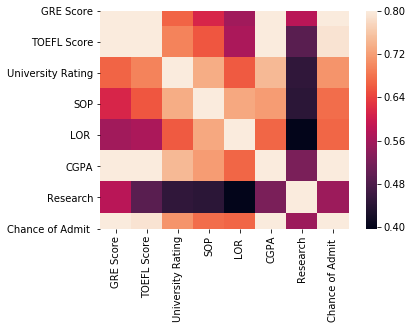

In [55]:
# Correlation Matrix
cor_mat = data.corr()

sns.heatmap(cor_mat, vmax= .8, square= True)
plt.show()

In [56]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

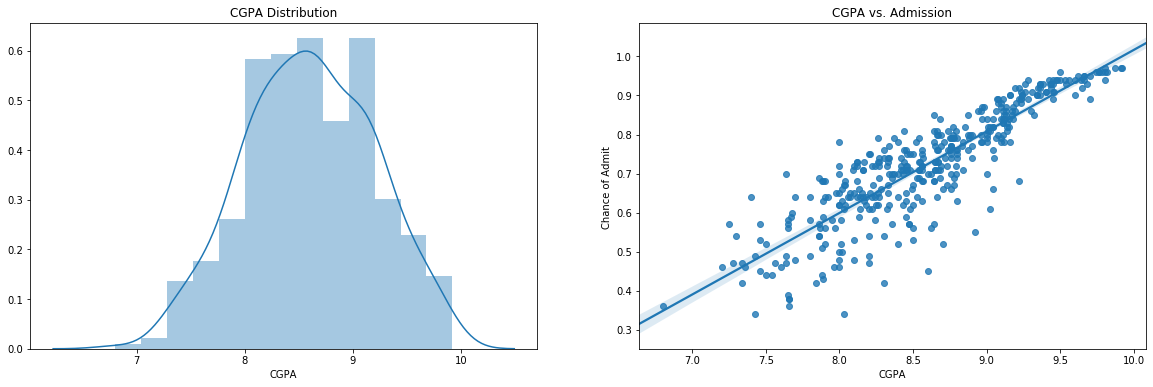

In [58]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['CGPA'])
plt.title('CGPA Distribution')

plt.subplot(1,2,2)
sns.regplot(data['CGPA'], data['Chance of Admit '])
plt.title('CGPA vs. Admission')
plt.show()

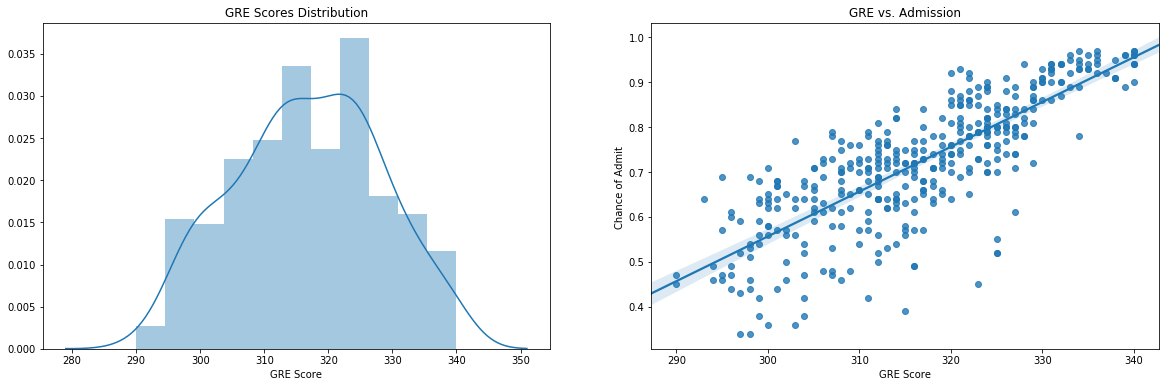

In [60]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['GRE Score'])
plt.title('GRE Scores Distribution')

plt.subplot(1,2,2)
sns.regplot(data['GRE Score'], data['Chance of Admit '])
plt.title('GRE vs. Admission')
plt.show()

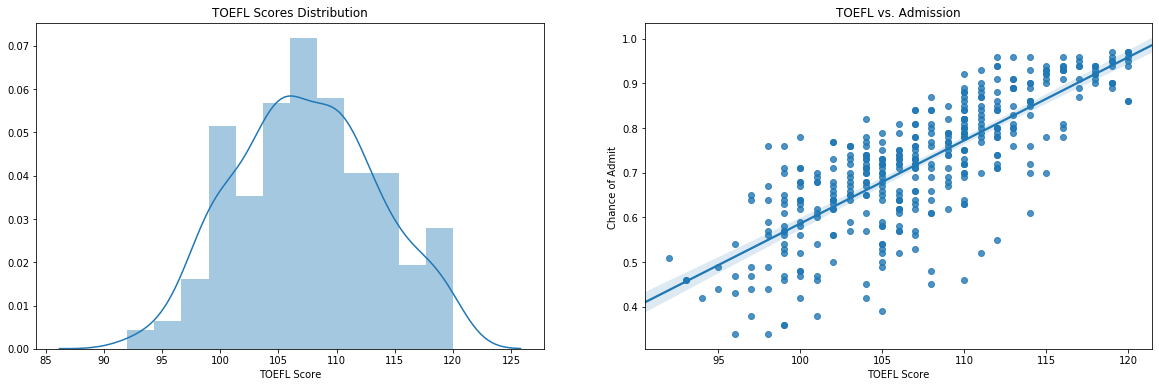

In [61]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['TOEFL Score'])
plt.title('TOEFL Scores Distribution')

plt.subplot(1,2,2)
sns.regplot(data['TOEFL Score'], data['Chance of Admit '])
plt.title('TOEFL vs. Admission')
plt.show()

[Text(0, 0, 'No Research Experience'), Text(0, 0, 'Has Research Experience')]

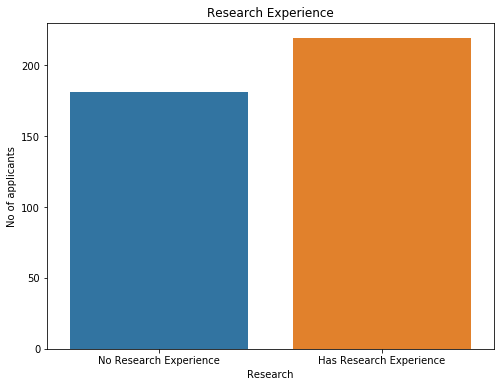

In [63]:
fig, ax = plt.subplots(figsize= (8,6))
sns.countplot(data['Research'])
plt.title('Research Experience')
plt.ylabel('No of applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])

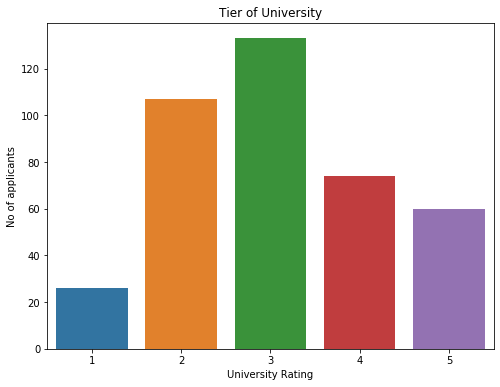

In [65]:
fig, ax = plt.subplots(figsize= (8,6))
sns.countplot(data['University Rating'])
plt.title('Tier of University')
plt.ylabel('No of applicants')
plt.show()

### Data Preparation

In [66]:
targets = data['Chance of Admit ']
features = data.drop(columns={'Chance of Admit '})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [69]:
lin = LinearRegression()
lin.fit(X_train, y_train)
y_predict = lin.predict(X_test)
lin_score = lin.score(X_test, y_test)
lin_score*100

81.7386788111443

In [73]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)
y_predict = d_tree.predict(X_test)
d_tree_score = d_tree.score(X_test, y_test)
d_tree_score*100

62.20960310281086

In [75]:
ran_for = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=0)
ran_for.fit(X_train, y_train)
y_predict = ran_for.predict(X_test)
ran_for_score = ran_for.score(X_test, y_test)
ran_for_score*100

81.28320642021393

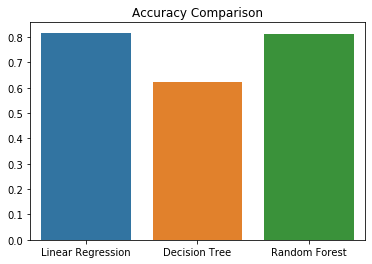

In [77]:
methods = ['Linear Regression', 'Decision Tree', 'Random Forest']
scores = np.array([lin_score, d_tree_score, ran_for_score])

fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(methods, scores)
plt.title('Accuracy Comparison')
plt.show()